## Set up notebook

In [14]:
%env PYTHONHASHSEED=0
#import libaries
import numpy as np
from numpy.random import seed
import random as python_random
import tensorflow as tf

# The below is necessary for starting Numpy generated random numbers in a well-defined initial state.
np.random.seed(10)

# The below is necessary for starting core Python generated random numbers in a well-defined state.
python_random.seed(120)

# The below set_seed() will make random number generation in the TensorFlow backend have a well-defined initial state.
tf.random.set_seed(123)

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import layers
from keras import backend as K
from keras import models

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, roc_auc_score
import itertools
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score

env: PYTHONHASHSEED=0


## Image Preprocessing (rescale, resize, reshape)

In [15]:
#create directory to train and test data
train_folder = '../data/train'
test_folder = '../data/test'

In [16]:
# get all the train data (5216 images) and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, 
        target_size=(224, 224), batch_size = 5216)

#get all the test data and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, 
        target_size=(224, 224), batch_size = 624 ) 

Found 3883 images belonging to 2 classes.
Found 390 images belonging to 2 classes.


In [17]:
#split data to images and labels
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

In [18]:
#reshape train and test images
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)

In [19]:
#reshape train and test labels
train_y = np.reshape(train_labels[:,0], (3883,1))
test_y = np.reshape(test_labels[:,0], (390,1))

## Build a baseline model (fully connected)

In [20]:
#create a Sequential model then add layers to it
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(150528,))) 
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Train model

In [21]:
#compile model and train data
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['acc',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives()])

histoire = model.fit(train_img, train_y,
                    epochs=10,
                    batch_size=25,
                    validation_split= 0.1, verbose = 1)

Train on 3494 samples, validate on 389 samples
Epoch 1/10
3494/3494 [==============================] - 7s 2ms/step - loss: 1.2401 - acc: 0.6514 - precision_1: 0.6603 - recall_1: 0.9893 - true_positives_1: 1144.5786 - true_negatives_1: 5.1357 - val_loss: 0.6517 - val_acc: 0.6350 - val_precision_1: 0.6546 - val_recall_1: 0.9905 - val_true_positives_1: 2405.6250 - val_true_negatives_1: 8.0000
Epoch 2/10
3494/3494 [==============================] - 5s 1ms/step - loss: 0.6208 - acc: 0.6557 - precision_1: 0.6514 - recall_1: 0.9935 - true_positives_1: 3656.6572 - true_negatives_1: 8.2929 - val_loss: 0.6241 - val_acc: 0.6350 - val_precision_1: 0.6542 - val_recall_1: 0.9952 - val_true_positives_1: 4942.6250 - val_true_negatives_1: 9.0000
Epoch 3/10
3494/3494 [==============================] - 5s 1ms/step - loss: 0.5906 - acc: 0.6932 - precision_1: 0.6575 - recall_1: 0.9893 - true_positives_1: 6155.9287 - true_negatives_1: 100.5571 - val_loss: 0.6023 - val_acc: 0.6941 - val_precision_1: 0.6663 -

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                3010580   
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 3,010,773
Trainable params: 3,010,773
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.save('Step02a_model.h5')

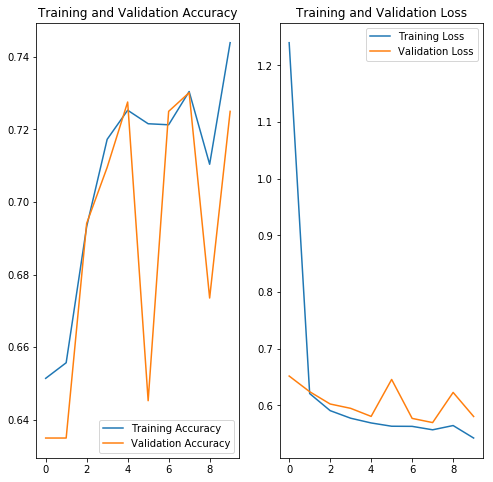

In [24]:
#create a ROC curve to assess accuracy and loss with different epochs
acc = histoire.history['acc']
val_acc = histoire.history['val_acc']

loss = histoire.history['loss']
val_loss = histoire.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()